# Capstone Project - Using Seattle Weather to Predict Severity of Accidents
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)


## Introduction: Business Problem <a name="introduction"></a>

The problem I would like to tackle is police and other first responders not having the resources to respond quickly to accidents. Studies have shown that a major factor in determining whether a victim of a car accident will live or die is how quickly they receive medical attention. If first responders were able to predict, based on weather and road conditions, when serious accidents are more likely to occur, they could increase the number of people working that day in order to respond to accidents closer to when they happen. My audience is first responders, specifically police officers and EMT’s in charge of scheduling shifts and determining how many people are working on a given day. They should care about this problem because there is a correlation between speed of responding to an accident and the mortality rate of a victim of the accident.

## Data <a name="data"></a>

The data I am using is a set of accidents that have occurred in Seattle city. The label for the data is “severity,” which in this case is used to describe the fatality of an accident. This data consists of both numerical and categorical data. With the categorical data, such as the weather condition at the time of the crash, I will have to find a way to convert to numerical values in order to analyze it. Because I am looking at this data in terms of predicting what weather conditions would require the largest number of first responders to be working in order to respond to accidents fastest, the data in this database that interests me most is weather and road condition. I can compare the number and severity of accidents in good weather conditions vs. bad ones. I am also interested in seeing how weather effects the tendency of drivers to engage in poor behavior. For example, are drivers who are speeding more likely to be involved in an accident in good weather or bad weather. I would also want to look at what type of accidents are the most common in different weather conditions, and how those types of accidents correlate with accident severity. 

## Methodology <a name="Methodology"></a>

In [ ]:
Below is the data analysis, statistical testing, and machine learning code I used to tackle this problem.

In [101]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
# read in accident data 
CSVpath = "C:/Users/JosephHackney/Coursera_Capstone/Data-Collisions.csv"
df_rawdata = pd.read_csv(CSVpath)
df_rawdata.head()
# Clean the data. First we will drop all of the rows where the severity of the accident is unknown or where the weather during the accident is unknown, as this is what we are trying to predict
df_accidents = pd.DataFrame()
df_accidents = df_rawdata[df_rawdata['SEVERITYCODE'] != 0]
df_accidents = df_rawdata[df_rawdata['WEATHER'] != 'Unknown']
# Drop unneeded columns
df_accidents.drop(['X','Y','OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS','INTKEY','SDOTCOLNUM','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','INCDTTM','SEVERITYDESC','SDOT_COLDESC', 'EXCEPTRSNCODE','EXCEPTRSNDESC'], axis=1, inplace=True)



In [ ]:
Now that we have cleaned the data, we are left with 21 columns and 179582 rows. We will now do some initial analysis of the data to see what it can tell us. We will first see the number of accidents based on weather, and then will look at the number of accidents for each reported road condition to see if there is a difference, and then we will look into the severity of these accidents.

In [102]:
# look to see how many accidents we have for each weather condition to ensure we have enough data to do a fair analysis
df_accidents.WEATHER.value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [103]:
# Blowing Sand / Dirt, Partly Cloudy, and Severe Crosswind account for less than 0.1% of the data, so we will drop them from the set. Snowing and Sleet/Hail/Freezing Rain are similiar weather conditions, so I decided to group them together and recategorize them as Snowing. Other isn't clear so we will drop that as well
index_names = df_accidents[(df_accidents['WEATHER'] == 'Blowing Sand/Dirt') | (df_accidents['WEATHER'] == "Partly Cloudy") | (df_accidents["WEATHER"] == "Severe Crosswind") | (df_accidents["WEATHER"] == "Other")].index
df_accidents.drop(index_names, inplace=True)
#df_accidents = df_accidents.loc[df_accidents.WEATHER == "Sleet/Hail/Freezing Rain","WEATHER"] == "Snowing" 
df_accidents.replace("Sleet/Hail/Freezing Rain", "Snowing", inplace=True)
df_accidents.WEATHER.value_counts()

Clear             111135
Raining            33145
Overcast           27714
Snowing             1020
Fog/Smog/Smoke       569
Name: WEATHER, dtype: int64

In [ ]:
We are now left with 173,583 rows of data. I want to now check if there is any difference in the severity of the accident based on the weather conditions.

In [104]:
# First I want to use transform the values for the speeding, under the influence, and inattention categories, turnng NaN and N values into 0's and Y into 1's. 
# SPEEDING
df_accidents["SPEEDING"] = df_accidents["SPEEDING"].fillna(0)
df_accidents["SPEEDING"].replace("Y", 1, inplace=True)
#INATTENTION
df_accidents["INATTENTIONIND"] = df_accidents["INATTENTIONIND"].fillna(0)
df_accidents["INATTENTIONIND"].replace("Y", 1, inplace=True)
#UNDER THE INFLUENCE
df_accidents["UNDERINFL"] = df_accidents["UNDERINFL"].fillna(0)
df_accidents["UNDERINFL"].replace("0", 0, inplace=True)
df_accidents["UNDERINFL"].replace("N", 0, inplace=True)
df_accidents["UNDERINFL"].replace("Y", 1, inplace=True)
df_accidents["UNDERINFL"].replace("1", 1, inplace=True)
# view results
df_accidents.groupby(['WEATHER']).mean()

,SEVERITYCODE,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,SPEEDING
WEATHER,,,,,,,,,,
Clear,1.322491,1.322491,2.499348,0.037846,0.035857,1.976992,14.205939,0.173816,0.052036,0.036991
Fog/Smog/Smoke,1.328647,1.328647,2.297012,0.042179,0.008787,1.898067,15.186292,0.182777,0.080844,0.084359
Overcast,1.315544,1.315544,2.480804,0.037779,0.029119,1.966263,14.330663,0.166162,0.049794,0.056181
Raining,1.337185,1.337185,2.512717,0.051501,0.018102,1.950219,14.659677,0.145874,0.054428,0.098959
Snowing,1.195098,1.195098,2.367647,0.028431,0.002941,1.968627,14.835294,0.061765,0.038235,0.203922


Run a statistical analysis to see if there is a difference in the results.


In [111]:
import scipy
from scipy import stats
# transform each group into a list
df_Wclear = df_accidents[df_accidents['WEATHER'] == "Clear"]
Wclear = df_Wclear["SEVERITYCODE"].to_list()
df_Wfss = df_accidents[df_accidents['WEATHER'] == "Fog/Smog/Smoke"]
Wfss = df_Wfss["SEVERITYCODE"].to_list()
df_Wovercast = df_accidents[df_accidents['WEATHER'] == "Overcast"]
Wovercast = df_Wovercast["SEVERITYCODE"].to_list()
df_Wraining = df_accidents[df_accidents['WEATHER'] == "Raining"]
Wraining = df_Wraining["SEVERITYCODE"].to_list()
df_Wsnowing = df_accidents[df_accidents['WEATHER'] == "Snowing"]
Wsnowing = df_Wsnowing["SEVERITYCODE"].to_list()
# One way ANOVA
F, p = stats.f_oneway(Wclear,Wfss,Wovercast,Wraining,Wsnowing)

The F value was high and the p value was very low, so we can assume that there is a statistical difference between the severity of accidents based on the weather. I now want to run this same analysis, but this time using road condition rather than weather

In [73]:
df_accidents.ROADCOND.value_counts()

Dry               123434
Wet                46959
Ice                 1106
Unknown              927
Snow/Slush           899
Standing Water       108
Other                107
Sand/Mud/Dirt         66
Oil                   60
Name: ROADCOND, dtype: int64

For similiar reasons as the weather analysis, I will be dropping unknown, other, standing water, sand/mud/dirt, and oil. These are unpredictable. I will also be combining Ice with Snow/Slush

In [74]:
index_names = df_accidents[(df_accidents['ROADCOND'] == 'Unknown') | (df_accidents['ROADCOND'] == "Standing Water") | (df_accidents["ROADCOND"] == "Other") | (df_accidents["ROADCOND"] == "Oil") | (df_accidents["ROADCOND"] == "Sand/Mud/Dirt")].index
df_accidents.drop(index_names, inplace=True)
#df_accidents = df_accidents.loc[df_accidents.WEATHER == "Sleet/Hail/Freezing Rain","WEATHER"] == "Snowing" 
df_accidents.replace("Snow/Slush", "Ice", inplace=True)
df_accidents.ROADCOND.value_counts()

Dry    123434
Wet     46959
Ice      2005
Name: ROADCOND, dtype: int64

In [75]:
df_accidents.groupby(['ROADCOND']).mean()

,SEVERITYCODE,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,SPEEDING
ROADCOND,,,,,,,,,,
Dry,1.322990,1.322990,2.501612,0.038223,0.035857,1.978134,14.197328,0.175162,0.051234,0.034091
Ice,1.211471,1.211471,2.321197,0.022943,0.007481,1.890274,16.283292,0.069825,0.038404,0.264339
Wet,1.333227,1.333227,2.502907,0.047297,0.019805,1.953470,14.598054,0.150024,0.055964,0.093188


In [112]:
# transform each group into a list
df_Rdry = df_accidents[df_accidents['ROADCOND'] == "Dry"]
Rdry = df_Rdry["SEVERITYCODE"].to_list()
df_Rice = df_accidents[df_accidents['ROADCOND'] == "Ice"]
Rice = df_Rice["SEVERITYCODE"].to_list()
df_Rwet = df_accidents[df_accidents['ROADCOND'] == "Wet"]
Rwet = df_Rwet["SEVERITYCODE"].to_list()
# One way ANOVA
F, p = stats.f_oneway(Rdry,Rice,Rwet)

The F value was high and the p value was very low, so we can assume that there is a statistical difference between the severity of accidents based on the weather.

The results went against my initial hypothesis. I would have believed that ice would cause the most severe accidents. However, this is not the case. Accidents that occur when the road condition is "ice" are less severe than other road conditions. Furthermore, it seems as if drivers pay significantly more attention to the road during ice conditions, which could explain why these accidents are more likely to only involve one car. One thing that sticks out on this table is that over 25% of accidents that occur when the road condition is ice are due to speeding
Both of these features seem to have an impact on accident severity. What if we look at both at the same time?

In [76]:
df_accidents.groupby(["ROADCOND","WEATHER"]).mean()

SEVERITYCODE  SEVERITYCODE.1  PERSONCOUNT  PEDCOUNT  \
ROADCOND WEATHER                                                               
Dry      Clear               1.323639        1.323639     2.503081  0.038136   
         Fog/Smog/Smoke      1.337989        1.337989     2.416201  0.047486   
         Overcast            1.318151        1.318151     2.494901  0.038317   
         Raining             1.318253        1.318253     2.511700  0.040562   
         Snowing             1.366667        1.366667     2.600000  0.100000   
Ice      Clear               1.257802        1.257802     2.364993  0.021710   
         Fog/Smog/Smoke      1.378378        1.378378     1.972973  0.054054   
         Overcast            1.184358        1.184358     2.192737  0.030726   
         Raining             1.273585        1.273585     2.452830  0.056604   
         Snowing             1.162730        1.162730     2.341207  0.014436   
Wet      Clear               1.328147        1.328147     2.481523  0.034176   
         Fog/Smog/Smoke      1.300613        1.300613     2.122699  0.024540   
         Overcast            1.321860        1.321860     2.481116  0.038047   
         Raining             1.338135        1.338135     2.515274  0.051844   
         Snowing             1.293839        1.293839     2.464455  0.071090   

                         PEDCYLCOUNT  VEHCOUNT  SDOT_COLCODE  INATTENTIONIND  \
ROADCOND WEATHER                                                               
Dry      Clear              0.036403  1.978859     14.180233        0.175522   
         Fog/Smog/Smoke     0.008380  1.960894     14.192737        0.178771   
         Overcast           0.033620  1.978061     14.256535        0.173042   
         Raining            0.018721  1.897036     15.177847        0.160686   
         Snowing            0.000000  1.933333     14.466667        0.166667   
Ice      Clear              0.014925  1.823609     17.443691        0.074627   
         Fog/Smog/Smoke     0.000000  1.756757     17.270270        0.108108   
         Overcast           0.008380  1.846369     16.804469        0.081006   
         Raining            0.000000  1.896226     15.462264        0.132075   
         Snowing            0.001312  1.981627     14.982940        0.047244   
Wet      Clear              0.024729  1.970825     14.643790        0.158099   
         Fog/Smog/Smoke     0.012270  1.815951     16.515337        0.208589   
         Overcast           0.023535  1.952930     14.460372        0.159535   
         Raining            0.018130  1.952875     14.625326        0.145970   
         Snowing            0.009479  1.943128     14.355450        0.099526   

                         UNDERINFL  SPEEDING  
ROADCOND WEATHER                              
Dry      Clear            0.051928  0.033482  
         Fog/Smog/Smoke   0.072626  0.036313  
         Overcast         0.045176  0.035845  
         Raining          0.073323  0.088924  
         Snowing          0.066667  0.066667  
Ice      Clear            0.036635  0.314790  
         Fog/Smog/Smoke   0.054054  0.270270  
         Overcast         0.033520  0.256983  
         Raining          0.103774  0.150943  
         Snowing          0.031496  0.236220  
Wet      Clear            0.062517  0.082523  
         Fog/Smog/Smoke   0.104294  0.141104  
         Overcast         0.058140  0.080744  
         Raining          0.054110  0.098162  
         Snowing          0.061611  0.109005

<AxesSubplot:xlabel='WEATHER', ylabel='ROADCOND'>

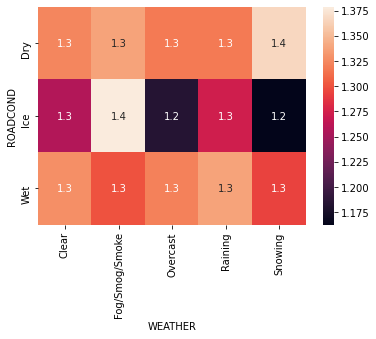

In [88]:
# Create a heatmap to show this in a more digestible way
import matplotlib as plt
heatmap = df_accidents.groupby(["ROADCOND","WEATHER"]).mean()
df_heatmap = heatmap.reset_index()
pivot = df_heatmap.pivot(index="ROADCOND", columns="WEATHER", values = "SEVERITYCODE")
ax = sns.heatmap(pivot, annot=True)
ax


From the table and the heatmap, it is clear that Icy conditions cause the least severe accidents, but they also are the most likely to be caused by an identifiable reason, speeding. Lets look at that further.

<AxesSubplot:xlabel='WEATHER', ylabel='ROADCOND'>

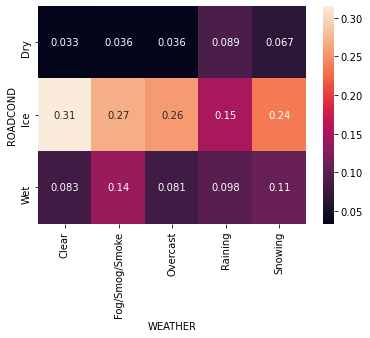

In [89]:
# doing the same thing for speeding
pivot = df_heatmap.pivot(index="ROADCOND", columns="WEATHER", values = "SPEEDING")
ax2 = sns.heatmap(pivot, annot=True)
ax2

Now we will use machine learning to try to predict the severity of accidents. We will be using a decision tree.

In [123]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import metrics

# convert roadcond and weather values from categorical values to numerical
df_cat = df_accidents[["ROADCOND",'WEATHER']]
df_cat["ROADCOND"] = df_cat["ROADCOND"].astype('category')
df_cat["WEATHER"] = df_cat["WEATHER"].astype('category')
df_cat["ROADCOND_CAT"] = df_cat["ROADCOND"].cat.codes
df_cat["WEATHER_CAT"] = df_cat["WEATHER"].cat.codes
# save data
X = df_cat[["ROADCOND_CAT","WEATHER_CAT"]].values
y = df_accidents[["SEVERITYCODE"]].values

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y , test_size=0.2, random_state=3)
dTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dTree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [124]:
# predict
pTree = dTree.predict(X_testset)
score = metrics.accuracy_score(y_testset, pTree)
score

0.6844653401617552

Our decision tree was able to predict correctly 68% of the time whether an accident would be fatal or not.

## Results <a name="results"></a>

The analysis of Seattle car accidents and how weather influences the severity of them shows some interesting results. We were able to draw statistically significant conclusions about how the fatality rate of accidents is effected by various road and weather condition combinations. We were also able to show that speeding is much more likely to be the cause of accidents when the road condition is icy. On of the more interesting results was that the combination that was most likely to have a fatal accident was a dry road and snowing weather. A possible reason for this is that people have a false sense of security when it is snowing but the roads are seemingly in good condition.

## Discussion <a name="discussion"></a>

Based on the analysis, it seems like there is an oppurtunity to decrease the number of crashes that occur due to ice. A whopping 26% of accidents that occured when the road condition was ice occured due to speeding. There are a number of ways that the Seattle Police Department could take advantage of this knowledge. By increasing their presence during icy conditions, or having road signs that display the drivers speed, they can encourage drivers to decrease their speed. A public awareness campaign focused on this could save lives. 
Another take away is that accidents are more likely to be fatal when it is snowing or icy. These conditions obviously are more likely to occur in the winter months, and are predictable a few days in advance. Using this knowledge, first responders in Seattle could increase their numbers during these months to be able to respond faster to any accidents that do occur.

## Conclusion <a name="conclusion"></a>

In this study, I used data analysis to show that there road and weather conditions have a statistically significant effect on the fatality rate of accidents. I identified that speeding is a very signicant cause of accidents when roads are icy. I also trained a machine learning model that can predict whether an accident will be fatal or not with 68% accuracy. This model could be very useful for first responders trying to predict if they will need more resources based on the weather conditions.